In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv("train.csv")
data.info()
data.columns.tolist()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

### Exploratory data analysis of training set

In [4]:
data.describe()
data.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

/anaconda3/envs/py3/lib/python3.6/site-packages/numpy/lib/histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/py3/lib/python3.6/site-packages/numpy/lib/histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


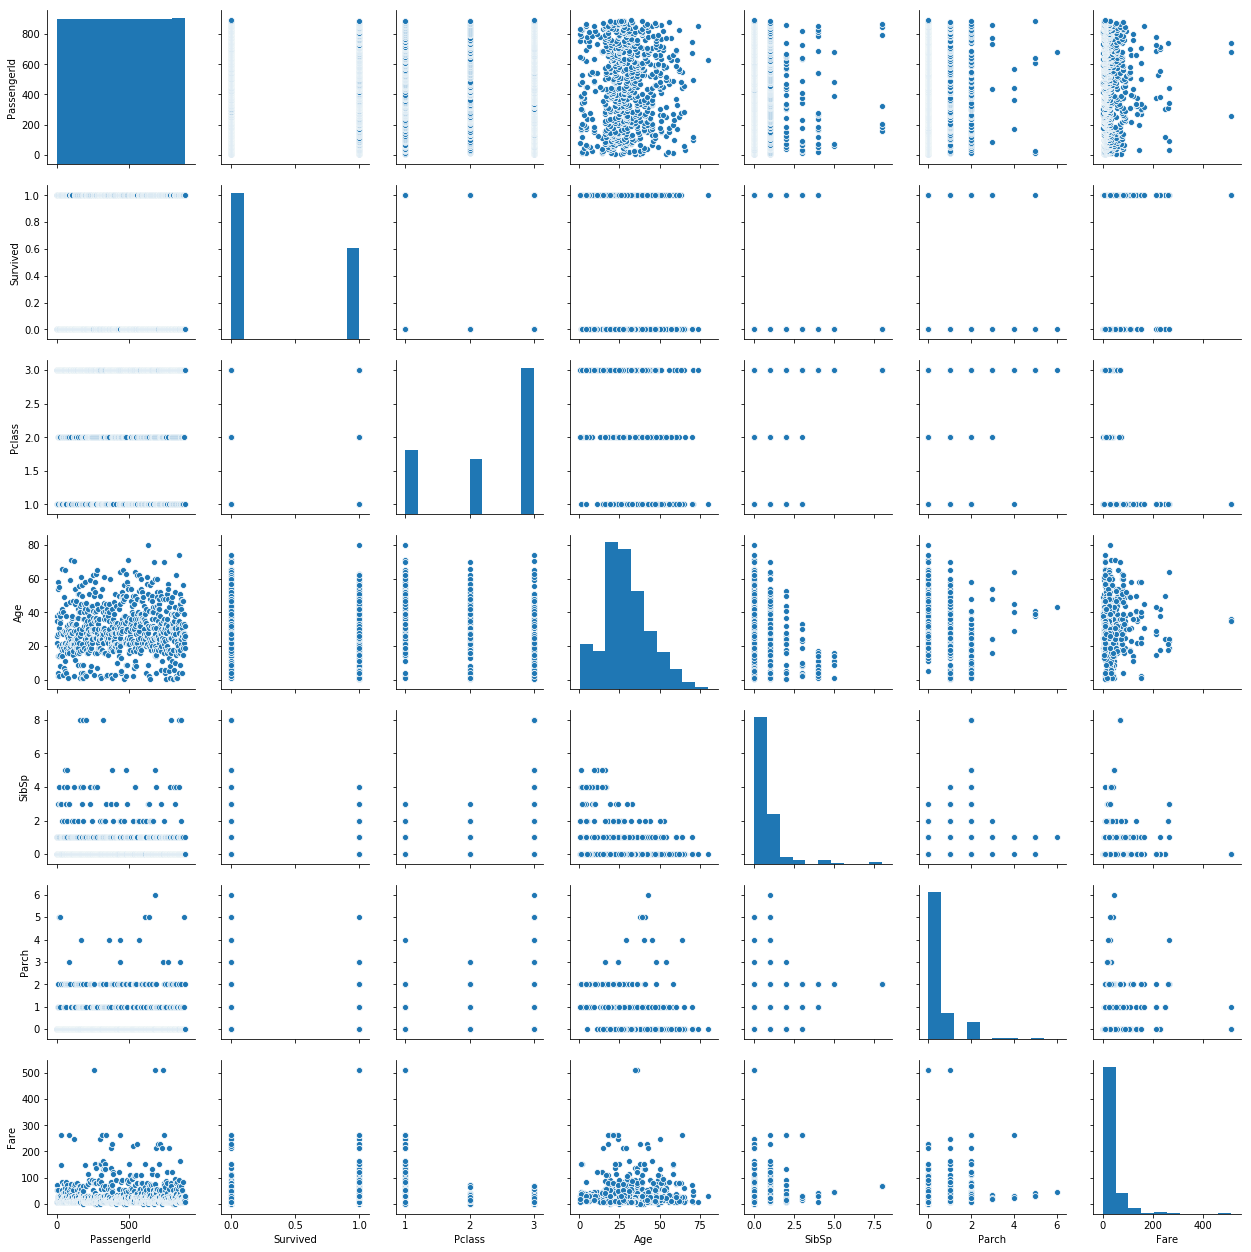

In [5]:
def pairplots(df):
    sns.pairplot(df, dropna=True)
pairplots(data)

In [6]:
for column in ['Survived', 'Pclass']:
    data[column] = data[column].astype('str')

In [7]:
data['title'] = data['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip()) #extract titles from names
data['title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
Lady              1
Sir               1
Jonkheer          1
Ms                1
Mme               1
Capt              1
the Countess      1
Don               1
Name: title, dtype: int64

In [8]:
top_titles = data['title'].value_counts()[0:5].index.tolist() #get most common titles
top_titles

['Mr', 'Miss', 'Mrs', 'Master', 'Dr']

In [9]:
data.groupby('title').describe() #distribution of age by title

Age                                                          \
              count       mean        std    min     25%   50%    75%   max   
title                                                                         
Capt            1.0  70.000000        NaN  70.00  70.000  70.0  70.00  70.0   
Col             2.0  58.000000   2.828427  56.00  57.000  58.0  59.00  60.0   
Don             1.0  40.000000        NaN  40.00  40.000  40.0  40.00  40.0   
Dr              6.0  42.000000  12.016655  23.00  35.000  46.5  49.75  54.0   
Jonkheer        1.0  38.000000        NaN  38.00  38.000  38.0  38.00  38.0   
Lady            1.0  48.000000        NaN  48.00  48.000  48.0  48.00  48.0   
Major           2.0  48.500000   4.949747  45.00  46.750  48.5  50.25  52.0   
Master         36.0   4.574167   3.619872   0.42   1.000   3.5   8.00  12.0   
Miss          146.0  21.773973  12.990292   0.75  14.125  21.0  30.00  63.0   
Mlle            2.0  24.000000   0.000000  24.00  24.000  24.0  24.00  24.0   
Mme             1.0  24.000000        NaN  24.00  24.000  24.0  24.00  24.0   
Mr            398.0  32.368090  12.708793  11.00  23.000  30.0  39.00  80.0   
Mrs           108.0  35.898148  11.433628  14.00  27.750  35.0  44.00  63.0   
Ms              1.0  28.000000        NaN  28.00  28.000  28.0  28.00  28.0   
Rev             6.0  43.166667  13.136463  27.00  31.500  46.5  53.25  57.0   
Sir             1.0  49.000000        NaN  49.00  49.000  49.0  49.00  49.0   
the Countess    1.0  33.000000        NaN  33.00  33.000  33.0  33.00  33.0   

               Fare            ...  PassengerId         SibSp            \
              count       mean ...          75%    max  count      mean   
title                          ...                                        
Capt            1.0  71.000000 ...       746.00  746.0    1.0  1.000000   
Col             2.0  31.025000 ...       683.25  695.0    2.0  0.000000   
Don             1.0  27.720800 ...        31.00   31.0    1.0  0.000000   
Dr              7.0  49.168457 ...       714.00  797.0    7.0  0.571429   
Jonkheer        1.0   0.000000 ...       823.00  823.0    1.0  0.000000   
Lady            1.0  39.600000 ...       557.00  557.0    1.0  1.000000   
Major           2.0  28.525000 ...       515.25  537.0    2.0  0.000000   
Master         40.0  34.703125 ...       764.00  870.0   40.0  2.300000   
Miss          182.0  43.797873 ...       612.25  889.0  182.0  0.714286   
Mlle            2.0  59.402100 ...       693.75  711.0    2.0  0.000000   
Mme             1.0  69.300000 ...       370.00  370.0    1.0  0.000000   
Mr            517.0  24.441560 ...       674.00  891.0  517.0  0.288201   
Mrs           125.0  45.138533 ...       679.00  886.0  125.0  0.696000   
Ms              1.0  13.000000 ...       444.00  444.0    1.0  0.000000   
Rev             6.0  18.312500 ...       793.50  887.0    6.0  0.166667   
Sir             1.0  56.929200 ...       600.00  600.0    1.0  1.000000   
the Countess    1.0  86.500000 ...       760.00  760.0    1.0  0.000000   

                                                 
                   std  min  25%  50%  75%  max  
title                                            
Capt               NaN  1.0  1.0  1.0  1.0  1.0  
Col           0.000000  0.0  0.0  0.0  0.0  0.0  
Don                NaN  0.0  0.0  0.0  0.0  0.0  
Dr            0.975900  0.0  0.0  0.0  1.0  2.0  
Jonkheer           NaN  0.0  0.0  0.0  0.0  0.0  
Lady               NaN  1.0  1.0  1.0  1.0  1.0  
Major         0.000000  0.0  0.0  0.0  0.0  0.0  
Master        1.910833  0.0  1.0  1.0  4.0  8.0  
Miss          1.431961  0.0  0.0  0.0  1.0  8.0  
Mlle          0.000000  0.0  0.0  0.0  0.0  0.0  
Mme                NaN  0.0  0.0  0.0  0.0  0.0  
Mr            0.821298  0.0  0.0  0.0  0.0  8.0  
Mrs           0.598708  0.0  0.0  1.0  1.0  3.0  
Ms                 NaN  0.0  0.0  0.0  0.0  0.0  
Rev           0.408248  0.0  0.0  0.0  0.0  1.0  
Sir                NaN  1.0  1.0  

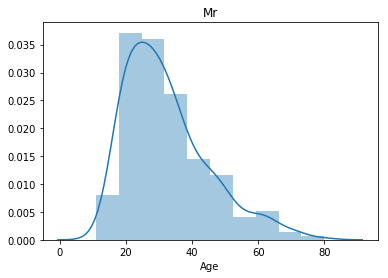

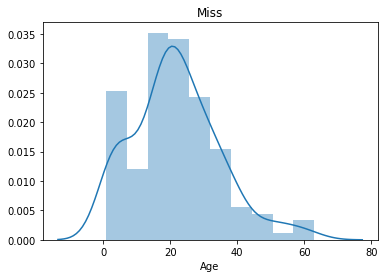

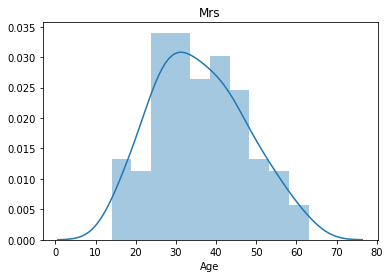

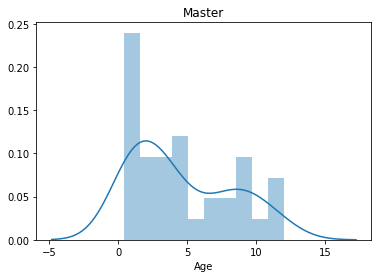

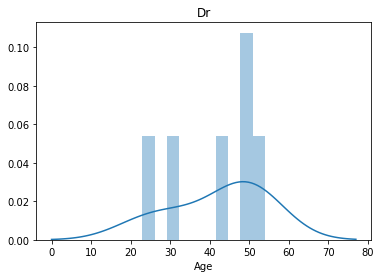

In [10]:
def age_hist(df):
    for title in top_titles: #visualize age distribution of titles
        sns.distplot(df['Age'][df['title']==title].dropna(), bins = 10)
        plt.title(title)
        plt.show()
age_hist(data)

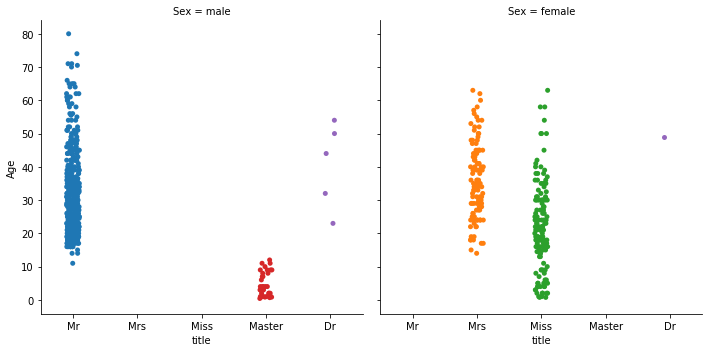

In [11]:
def age_spread(df):
    sns.catplot(x="title", y="Age", data=df[df['title'].isin(top_titles)], col = "Sex")
    
age_spread(data)

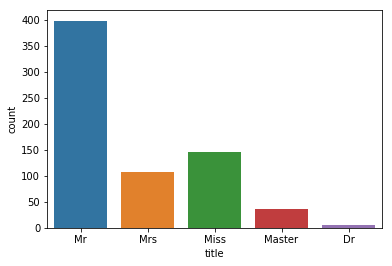

In [12]:
def count_age_na(df):
    sns.countplot(x="title",data = df[['Age','title']][df['title'].isin(top_titles)].dropna()) #visualize number of missing values for top titles
    
count_age_na(data)
    

In [13]:
age_medians = {} #create dictionary of medians for each title using training set
for title in np.unique(data['title']):
    age_medians[title] = data['Age'][data['title']==title].median()
age_medians['overall'] = data['Age'].median()

In [15]:
def fill_age(df): #create function for filling age NAs in train and test set, using training set medians
    title = df['title'].unique().item()
    if title in age_medians.keys():
        df['Age'] = df['Age'].fillna(age_medians[title])
    else:
        df['Age'] = df['Age'].fillna(age_medians['overall'])
    return df

data = data.groupby('title').apply(lambda x: fill_age(x))

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null object
Pclass         891 non-null object
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
title          891 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 90.6+ KB


In [17]:
data['Cabin'].value_counts()

G6                 4
B96 B98            4
C23 C25 C27        4
F33                3
E101               3
F2                 3
C22 C26            3
D                  3
D36                2
C83                2
E33                2
B49                2
C123               2
D35                2
B5                 2
D33                2
E121               2
B58 B60            2
C125               2
E24                2
C93                2
B57 B59 B63 B66    2
C92                2
E8                 2
C124               2
B35                2
C65                2
D26                2
D17                2
E25                2
                  ..
C47                1
C99                1
B82 B84            1
D15                1
B37                1
D49                1
D19                1
A32                1
C101               1
C110               1
B73                1
B69                1
B39                1
F38                1
B94                1
A16                1
D37          

In [18]:
def preproc_cabin(df):
    
    #clean Cabin data
    df['Cabin_Deck']= np.NaN
    df['Cabin_Number']=np.NaN
    df['Cabin_Deck'][~df['Cabin'].isna()]  = df['Cabin'][~df['Cabin'].isna()].apply(lambda x:x[0])
    df['Cabin_Number'][~df['Cabin'].isna()]  = df['Cabin'][~df['Cabin'].isna()].apply(lambda x:x[1:].split(' ')[0]) #retain only first booth number if entries have multiple booths
    
    return df

train = preproc_cabin(data)

/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [19]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,Cabin_Deck,Cabin_Number
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,C,85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,C,123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,NaN,NaN


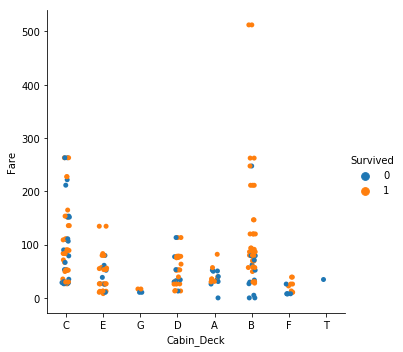

In [20]:
sns.catplot("Cabin_Deck","Fare", data=data, hue='Survived')

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId     891 non-null int64
Survived        891 non-null object
Pclass          891 non-null object
Name            891 non-null object
Sex             891 non-null object
Age             891 non-null float64
SibSp           891 non-null int64
Parch           891 non-null int64
Ticket          891 non-null object
Fare            891 non-null float64
Cabin           204 non-null object
Embarked        889 non-null object
title           891 non-null object
Cabin_Deck      204 non-null object
Cabin_Number    204 non-null object
dtypes: float64(2), int64(3), object(10)
memory usage: 104.5+ KB


#### data will be preprocessed as follows before training and fitting:
- extract titles from names 
- fill Age NA values with the median age using title as a reference. where title is unknown, fill with overall mean
- extract deck information from cabin 
- variables such as cabin_number, title, Fare, ticket  and Name will be excluded due to too many missing values or irrelevance


### Final Preprocessing for data sets

In [107]:
def preproc(df):
    
    #fill missing age values
    df['title'] = df['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip()) #extract titles from names
    df = df.groupby('title').apply(lambda x: fill_age(x))
    
    #transform cabin info
    df['Cabin_Deck']= np.NaN
    df['Cabin_Number']=np.NaN
    df['Cabin_Deck'][~df['Cabin'].isna()]  = df['Cabin'][~df['Cabin'].isna()].apply(lambda x:x[0])
    df['Cabin_Number'][~df['Cabin'].isna()]  = df['Cabin'][~df['Cabin'].isna()].apply(lambda x:x[1:].split(' ')[0]) #retain only first booth number if entries have multiple booths
    df['Cabin_Number'] =  pd.to_numeric(df['Cabin_Number'], errors='coerce')
    
    #change Pclass to categorical var
    df['Pclass']=df['Pclass'].astype('str')
    
    #include only variables of interest
    variables = ["Pclass","Sex","Age","SibSp","Parch", "Embarked","Cabin_Deck"]
    
    df = df[variables]
    
    cat_var = ["Sex","Embarked","Cabin_Deck"]
    
    df = pd.get_dummies(df, columns=cat_var)
    
    return df


In [108]:
X = preproc(data)
y = data["Survived"]


/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


### Model training and predictions

In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=101)
rf_model = RandomForestClassifier(n_estimators=8)


In [115]:
rf_model.fit(X_train,y_train)
train_predictions = rf_model.predict(X_train)

print("Training error is :{}".format(accuracy_score(y_train,train_predictions)))


Training error is :0.9438202247191011


In [116]:
print("Test error is :{}".format(accuracy_score(y_test,rf_model.predict(X_test))))


Test error is :0.7686567164179104


In [112]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]

scores = []
for n in n_estimators:
    rf_model = RandomForestClassifier(n_estimators = n)
    rf_model.fit(X_train,y_train)
    predictions = rf_model.predict(X_test)
    scores.append(accuracy_score(y_test,predictions))

In [113]:
for n,score in zip(n_estimators,scores):
    print("{} estimators: score{}".format(n,score))

1 estimators: score0.7798507462686567
2 estimators: score0.7425373134328358
4 estimators: score0.7873134328358209
8 estimators: score0.7835820895522388
16 estimators: score0.7723880597014925
32 estimators: score0.7723880597014925
64 estimators: score0.7798507462686567
100 estimators: score0.7835820895522388
200 estimators: score0.7835820895522388


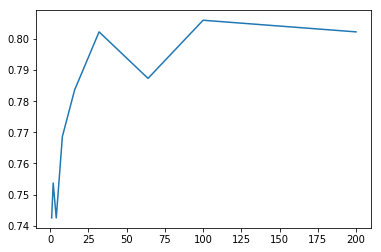

In [96]:
plt.plot(n_estimators, scores)

In [92]:
score

0.7985074626865671

In [117]:
test = pd.read_csv("test.csv")

In [118]:
cleaned_test = preproc(test)

/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [120]:
cleaned_test.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Cabin_Deck_A',
       'Cabin_Deck_B', 'Cabin_Deck_C', 'Cabin_Deck_D', 'Cabin_Deck_E',
       'Cabin_Deck_F', 'Cabin_Deck_G'],
      dtype='object')

In [124]:
def add_missing_dummy_columns(train, test):
    missing_cols = set(train.columns) - set(test.columns)
    for c in missing_cols:
        test[c] = 0
    return test

In [125]:
cleaned_test2  = add_missing_dummy_columns(X,cleaned_test)

In [126]:
cleaned_test2.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Cabin_Deck_A',
       'Cabin_Deck_B', 'Cabin_Deck_C', 'Cabin_Deck_D', 'Cabin_Deck_E',
       'Cabin_Deck_F', 'Cabin_Deck_G', 'Cabin_Deck_T'],
      dtype='object')

In [137]:
rf_model.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=8, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [138]:
predictions = rf_model.predict(cleaned_test2)

In [139]:
submission = pd.concat([test['PassengerId'],pd.DataFrame(predictions)], axis=1)

In [140]:
submission.columns = ["PassengerId","Survived"]

In [141]:
submission.to_csv('submission.csv', index=False)